In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [11]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)


In [26]:
len(X[1])

2

In [28]:
len(y)

1000

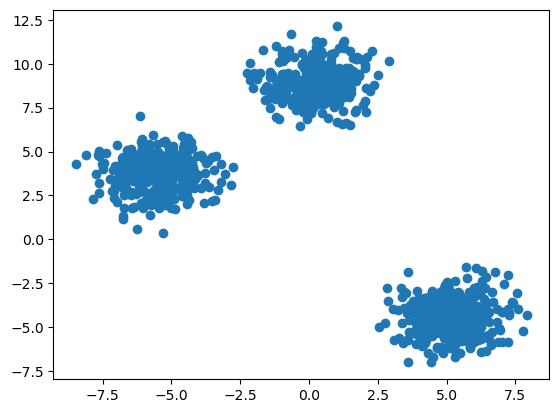

In [32]:
plt.scatter(X[:,0],X[:,1])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [52]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeansModel = KMeans(init='k-means++', n_clusters=k)
    kmeansModel.fit(x_train)
    wcss.append(kmeansModel.inertia_)
plt.plot(range(1,11),wcss)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [44]:
!pip install kneed

In [46]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex',direction='decreasing')
kl.elbow

3

In [54]:
kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(x_train)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [56]:
eff=[]
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    eff.append(score)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

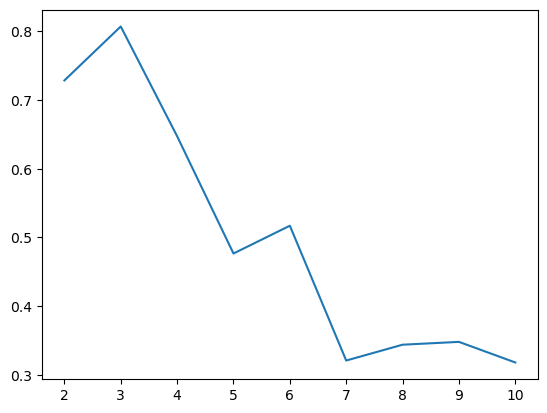

In [58]:
plt.plot(range(2,11),eff)